In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START,END

from typing import Annotated
from langgraph.graph.message import add_messages



In [2]:
class state(TypedDict):
    messages:Annotated[list, add_messages]
    


In [6]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [9]:
from langchain_groq import ChatGroq
llm= ChatGroq(model="llama-3.1-8b-instant")
llm.invoke("Hello")

AIMessage(content='Hello. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 36, 'total_tokens': 54, 'completion_time': 0.024, 'prompt_time': 0.001806214, 'queue_time': 0.045911316, 'total_time': 0.025806214}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f7bd09b454', 'finish_reason': 'stop', 'logprobs': None}, id='run--2d3244bf-ed41-4349-98de-342cb282b880-0', usage_metadata={'input_tokens': 36, 'output_tokens': 18, 'total_tokens': 54})

In [12]:
def superbot(state:state):
    return{"messages": [llm.invoke(state['messages'])]}


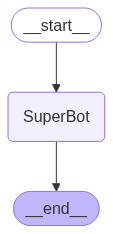

In [13]:
graph=StateGraph(state)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
graph_builder.invoke({'messages':"Hi,My name is Pravin And I support RCB"})

{'messages': [HumanMessage(content='Hi,My name is Pravin And I support RCB', additional_kwargs={}, response_metadata={}, id='f3bf4a15-f15e-49f0-a0c6-4297724b7a61'),
  AIMessage(content="Nice to meet you, Pravin! As an RCB supporter, I'm guessing you're a fan of the Royal Challengers Bangalore team in the Indian Premier League (IPL). They've had some talented players over the years, including Virat Kohli, AB de Villiers, and Yuzvendra Chahal. Who's your favorite RCB player, past or present?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 47, 'total_tokens': 127, 'completion_time': 0.106666667, 'prompt_time': 0.002487268, 'queue_time': 0.047465251, 'total_time': 0.109153935}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f7bd09b454', 'finish_reason': 'stop', 'logprobs': None}, id='run--f9d5b867-2cc1-4815-b5ce-9ec6d0e7d13b-0', usage_metadata={'input_tokens': 47, 'output_tokens': 80, 'total_tokens': 127})]}

In [16]:
for event in graph_builder.stream({"messages":"Hi My name is pravin"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Nice to meet you, Pravin. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 41, 'total_tokens': 65, 'completion_time': 0.032, 'prompt_time': 0.002503285, 'queue_time': 0.047142255, 'total_time': 0.034503285}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_a4265e44d5', 'finish_reason': 'stop', 'logprobs': None}, id='run--0c9a7b4a-de68-472a-8f42-e88217c28b5b-0', usage_metadata={'input_tokens': 41, 'output_tokens': 24, 'total_tokens': 65})]}}
